# Context

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

Attribute Information Input features in order:
 1.  cap-shape               
 2.  cap-surface             
 3.  cap-color               
 4.  bruises                 
 5.  odor                    
 6.  gill-attachment         
 7.  gill-spacing            
 8.  gill-size               
 9.  gill-color              
 10. stalk-shape             
 11. stalk-root              
 12. stalk-surface-above-ring
 13. stalk-surface-below-ring
 14. stalk-color-above-ring  
 15. stalk-color-below-ring  
 16. veil-type               
 17. veil-color              
 18. ring-number             
 19. ring-type               
 20. spore-print-color       
 21. population              
 22. habitat

Output variable:
 0.  class: e/edible, p/poisonous

In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [34]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [35]:
edible = df['class'].value_counts(normalize=True)
print(f'Percentage of edible mushrooms: {edible[0] : .2%}')

Percentage of edible mushrooms:  51.80%


In [36]:
df.isnull().values.any()

False

In [37]:
df_proc = pd.get_dummies(data=df)
df_proc.tail()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
X = df_proc.drop(['class_e', 'class_p'], axis=1)
y = df_proc['class_e'].astype(int)

In [39]:
X.shape, y.shape

((8124, 117), (8124,))

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

1.0

In [42]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, X_train.columns).head(10)

,feat,score
27,odor_n,0.623007
53,stalk-root_c,0.172322
55,stalk-root_r,0.082753
100,spore-print-color_r,0.032472
34,gill-spacing_w,0.028023
20,bruises_f,0.024106
71,stalk-color-above-ring_w,0.017210
63,stalk-surface-below-ring_y,0.012373
88,ring-number_o,0.005886
1,cap-shape_c,0.000616


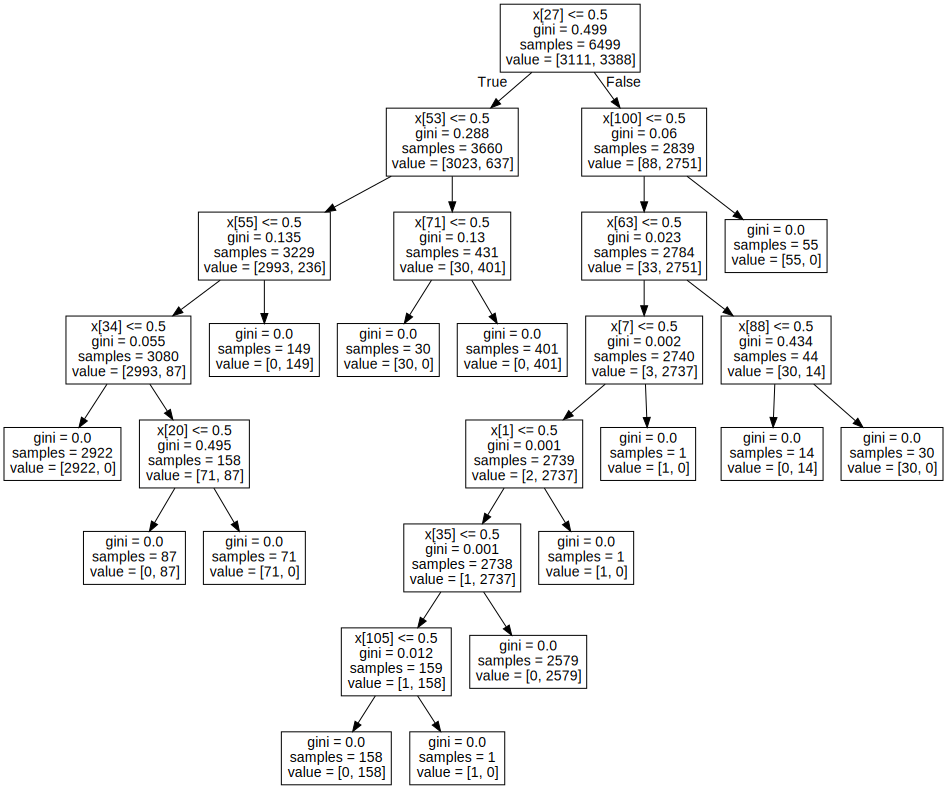

In [43]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[805   0]
 [  0 820]]


1.0

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20)
0.9996923076923077


In [46]:
#Standard Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC:', np.mean(scores))

Mean ROC AUC: 1.0


In [47]:
#Random Forest With Class Weighting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC:', np.mean(scores))

Mean ROC AUC: 1.0


In [48]:
#Random Forest With Bootstrap Class Weighting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC:', np.mean(scores))

Mean ROC AUC: 0.9999929566127345


In [49]:
#Random Forest With Random Undersampling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC:', np.mean(scores))

Mean ROC AUC: 1.0


In [50]:
#Easy Ensemble for Imbalanced Classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC:', np.mean(scores))

Mean ROC AUC: 1.0
